In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision.utils as vutils

In [109]:
class dAE(nn.Module):
    def __init__(self):
        super(dAE,self).__init__()
        
        self.encoder=nn.Sequential(
                      nn.Linear(784,400),
                      nn.ReLU(True),
                      nn.Linear(400,20),
                      nn.ReLU(True)
                      )

        self.decoder=nn.Sequential(
                      nn.Linear(20,400),
                      nn.ReLU(True),
                      nn.Linear(400,784),
                      nn.Sigmoid()
                      )

    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x

In [110]:
class AddRandomNoise(object):
    def __init__(self):
        self.row = 28
        self.col = 28
        
    def __call__(self, tensor):
        noise = torch.randn(tensor.size())
        tensor += tensor*noise
        return tensor
    
    def __repr__(self):
        return self.__class__.__name__

In [111]:
transform = transforms.Compose([transforms.ToTensor(), AddRandomNoise()])
trainset = torchvision.datasets.MNIST(root = './', train = True, download = True,transform = transform)
testset = torchvision.datasets.MNIST(root = './', train = False, download = True,transform = transform)

In [112]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(testset, batch_size = 5, shuffle = False)

In [113]:
# init network
ae = dAE()

In [114]:
#init optimizer
optimizer = optim.SGD(ae.parameters(), lr = 0.01, momentum = 0.9)
# init loss function
criterion = nn.BCELoss()

In [115]:
epochs = 30
losslist = []
predictions = []
# traing_accuracy_list = []
for epoch in range(0,epochs):
    total_loss = 0
#     training_accuracy = 0
    for data,label in train_loader:
        data =  Variable(data)
        data = data.view(-1, 784)
        # gradient is set to 0
        optimizer.zero_grad()
        # passing through the network
        net_out = ae(data)
        # calculaing BCE loss
        loss = criterion(net_out, data)
        # propogating loss at current step
        loss.backward()
        # updating parameters (in steps) after gradient descent
        optimizer.step()
        # calculate total loss
        total_loss += loss
        # predictions
        predictions.append(net_out)
#         accuracy
#         training_accuracy += pred.eq(target.data).sum()
    losslist.append(total_loss.item()/len(train_loader.dataset))
#     traing_accuracy_list.append(training_accuracy.item()/len(train_loader.dataset))
    print('loss at epoch: {} = {}'.format(epoch,total_loss/len(train_loader.dataset)))
        

loss at epoch: 0 = 0.006754949223250151
loss at epoch: 1 = 0.00420671422034502
loss at epoch: 2 = 0.004145263694226742
loss at epoch: 3 = 0.004067182075232267
loss at epoch: 4 = 0.0038846307434141636
loss at epoch: 5 = 0.003649760503321886
loss at epoch: 6 = 0.0034502011258155107
loss at epoch: 7 = 0.0032137830276042223
loss at epoch: 8 = 0.0030560032464563847
loss at epoch: 9 = 0.0029058107174932957
loss at epoch: 10 = 0.00277711171656847
loss at epoch: 11 = 0.0026763633359223604
loss at epoch: 12 = 0.0025881004985421896
loss at epoch: 13 = 0.0025048432871699333
loss at epoch: 14 = 0.002413382288068533
loss at epoch: 15 = 0.0023265944328159094
loss at epoch: 16 = 0.002225714735686779
loss at epoch: 17 = 0.0021325708366930485
loss at epoch: 18 = 0.002036187332123518
loss at epoch: 19 = 0.0019538123160600662
loss at epoch: 20 = 0.001871749060228467
loss at epoch: 21 = 0.0018072569509968162
loss at epoch: 22 = 0.0017289657844230533
loss at epoch: 23 = 0.0016579471994191408
loss at epoch:

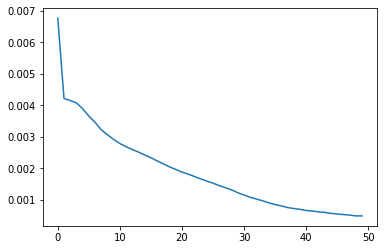

In [116]:
plt.plot(losslist)
# plt.savefig(fname='dae.png',format='png')

In [117]:
torch.save(ae, "hw5_dAE.pth")
model = dAE()
model = torch.load( "hw5_dAE.pth")

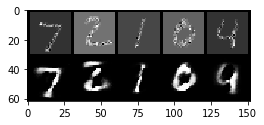

In [118]:
for image_test,label in test_loader:
    image_test = Variable(image_test)
    image_test = image_test.view(-1, 784)
    output = model(image_test)
    image_test = image_test.view(image_test.size(0), 1, 28, 28)
    output = output.view(output.size(0), 1, 28, 28)
    all_img = torch.cat([image_test, output], dim=0)
    horizontal_grid = vutils.make_grid(all_img, nrow=5, normalize=True, scale_each=True)
    fig = plt.figure(figsize=(4, 4))
    plt.imshow(np.moveaxis(horizontal_grid.detach().numpy(), 0, -1))
    break